In [2]:
from pathlib import Path
import simplejson as json
import pandas as pd
import seaborn as sns

sns.set_theme()

In [3]:
def summarize_result(metric, result):
    if metric == 'beta_vae_sklearn':
        return result['eval_accuracy']
    elif metric == 'dci':
        return result['disentanglement']
    elif metric == 'downstream_task_boosted_trees':
        return result['10000:mean_test_accuracy']
    elif metric == 'downstream_task_logistic_regression':
        return result['10000:mean_test_accuracy']
    elif metric == 'factor_vae_metric':
        return result['eval_accuracy']
    elif metric == 'irs':
        return result['IRS']
    elif metric == 'mig':
        return result['discrete_mig']
    elif metric == 'modularity_explicitness':
        return result['modularity_score']
    elif metric == 'sap_score':
        return result['SAP_score']
    elif metric == 'unsupervised':
        return result['gaussian_wasserstein_correlation_norm']

In [4]:
def plot_results(path):
    base_dir = Path('./results/')
    table = {
        'experiment': [],
        'model': [],
        'dataset': [],
        'metric': [],
        'result_summary': []
    }
    
    for experiment_folder in list(base_dir.glob('*')):
        experiment = experiment_folder.name
        for model_folder in list(experiment_folder.glob('*')):
            for dataset_folder in list(model_folder.glob('*')):
                evaluation_folder = dataset_folder/'evaluation'
                if evaluation_folder.exists():
                    for metric_folder in list(evaluation_folder.glob('*')):
                        metric_results = metric_folder/'json'/'evaluation_results.json'
                        if metric_results.exists():
                            with open(metric_results, 'r') as f:
                                result = json.loads(f.read())
                            table['experiment'] += [experiment]
                            table['model'] += [model_folder.name]
                            table['dataset'] += [dataset_folder.name]
                            table['metric'] += [metric_folder.name]
                            table['result_summary'] += [summarize_result(metric_folder.name, result)]
    df = pd.DataFrame(table)
    g = sns.catplot(
        data=df, 
        x='experiment', 
        y='result_summary', 
        kind='bar', 
        row='metric', 
        col='dataset',
        sharey=False,
        margin_titles=True,
        row_order=['beta_vae_sklearn', 
                   'factor_vae_metric', 
                   'mig', 
                   'dci', 
                   'modularity_explicitness', 
                   'sap_score', 
                   'irs',
                   'downstream_task_logistic_regression',
                   'downstream_task_boosted_trees'],
        col_order=['dsprites_full', 
                   'smallnorb', 
                   'cars3d', 
                   'shapes3d']
    );

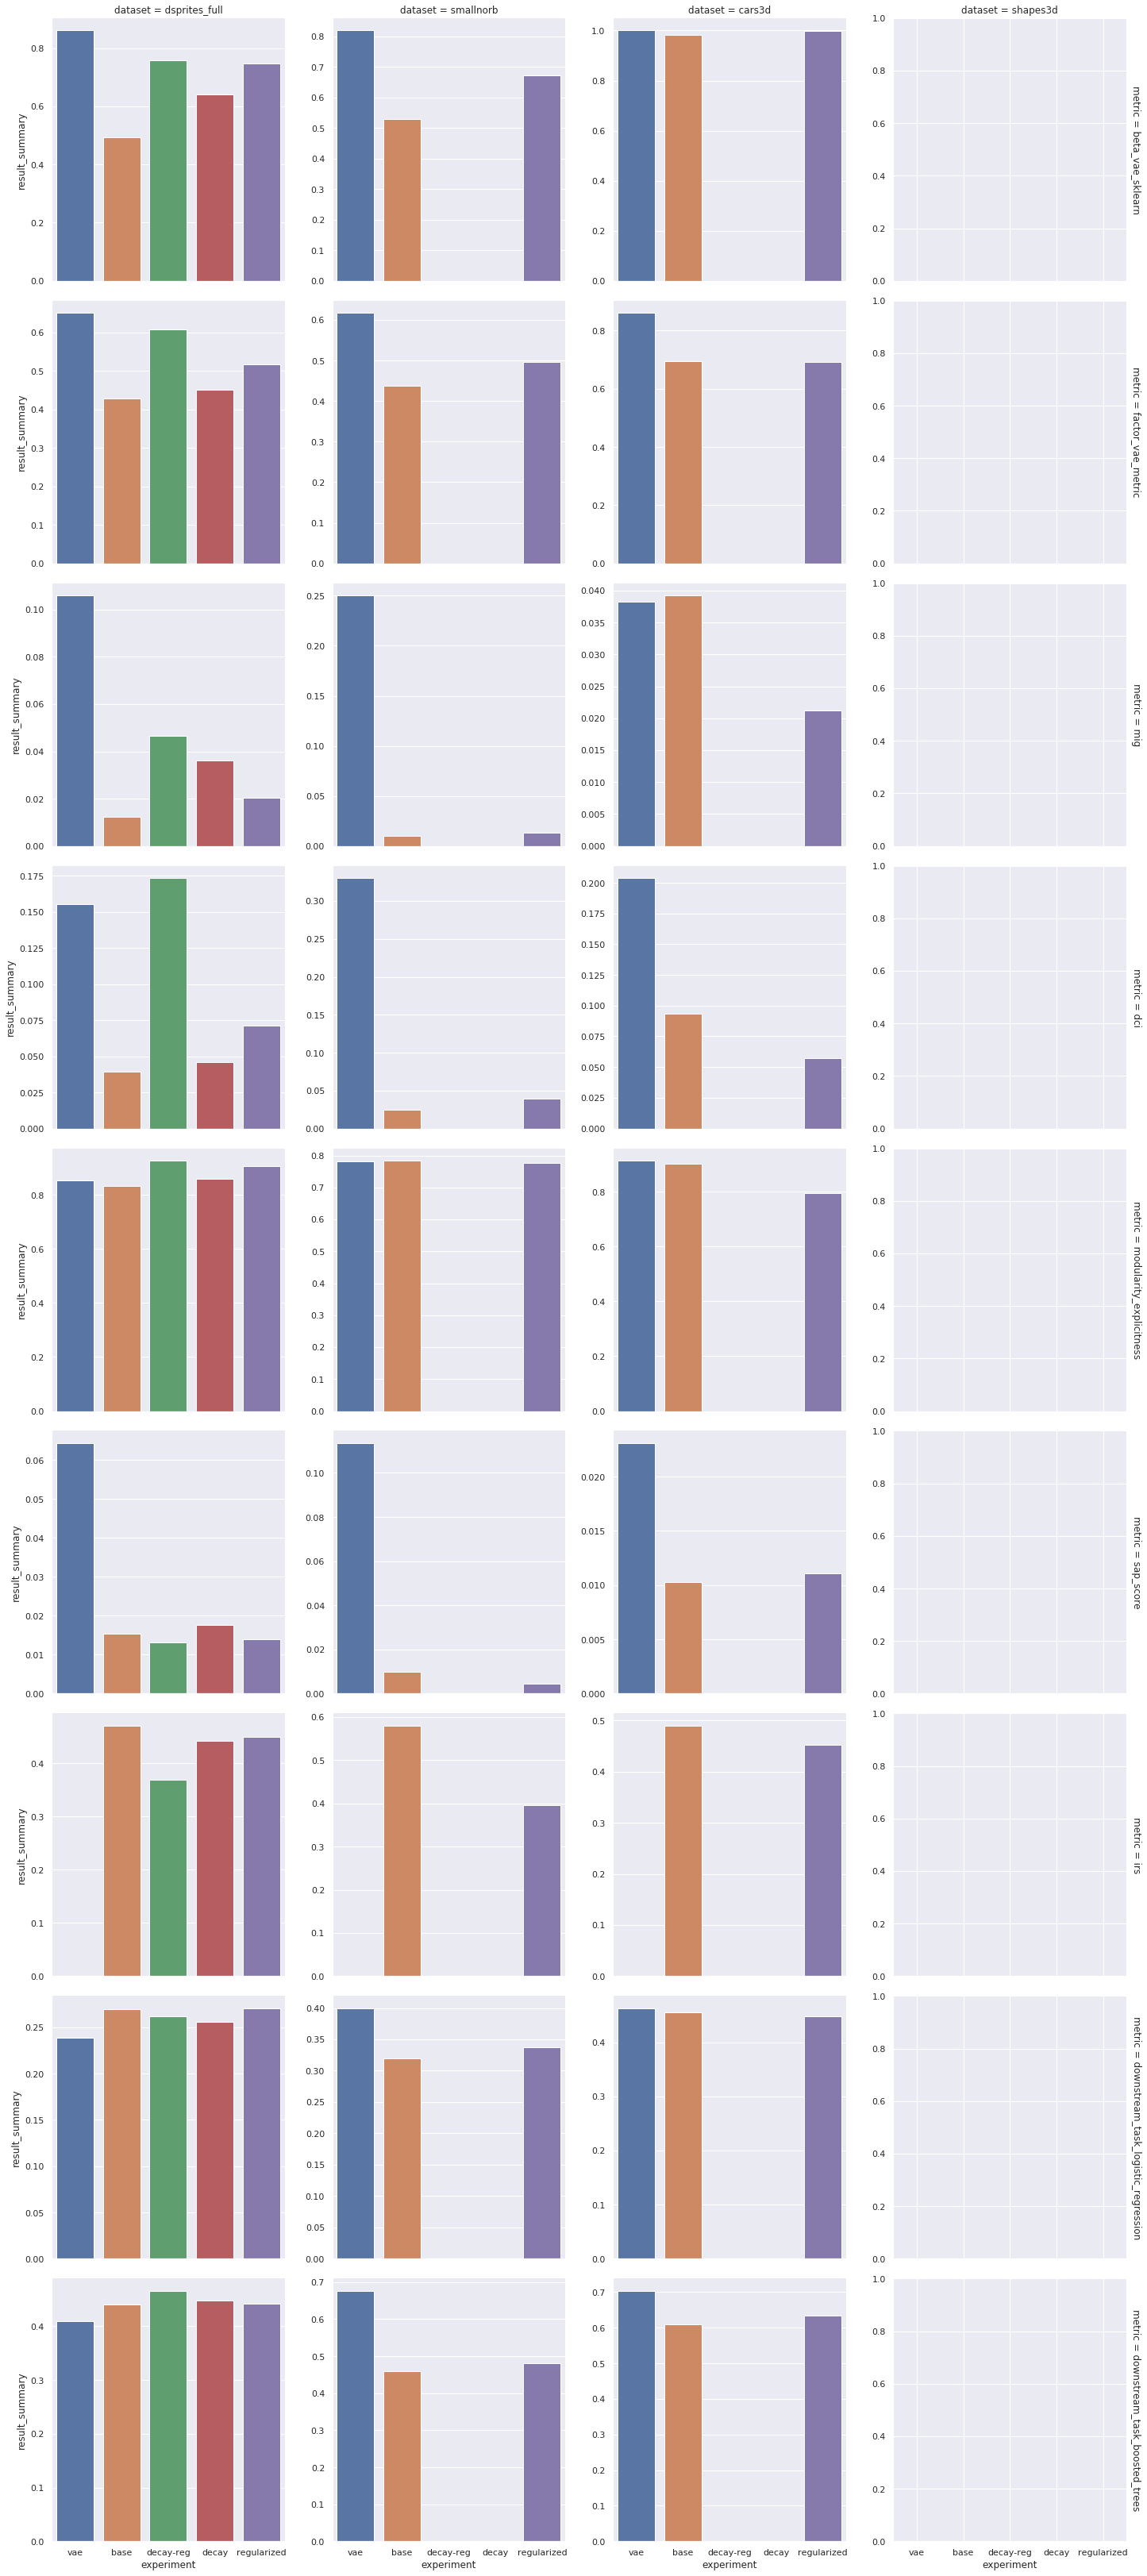

In [7]:
plot_results('./results/')